<a href="https://colab.research.google.com/github/Ifeanyi55/ImageGenerator/blob/main/ImageGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Required Libraries**

In [ ]:
!pip install -q git+https://github.com/huggingface/diffusers transformers accelerate safetensors gradio

# **Create Image Generating Function**

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:300: FutureWarning: `LoRACompatibleConv` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleConv` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleConv", "1.0.0", deprecation_message)
/usr/local/lib/python3.10/dist-packages/diffusers/models/lora.py:384: FutureWarning: `LoRACompatibleLinear` is deprecated and will be removed in version 1.0.0. Use of `LoRACompatibleLinear` is deprecated. Please switch to PEFT backend by installing PEFT: `pip install peft`.
  deprecate("LoRACompatibleLinear", "1.0.0", deprecation_message)


  0%|          | 0/50 [00:00<?, ?it/s]

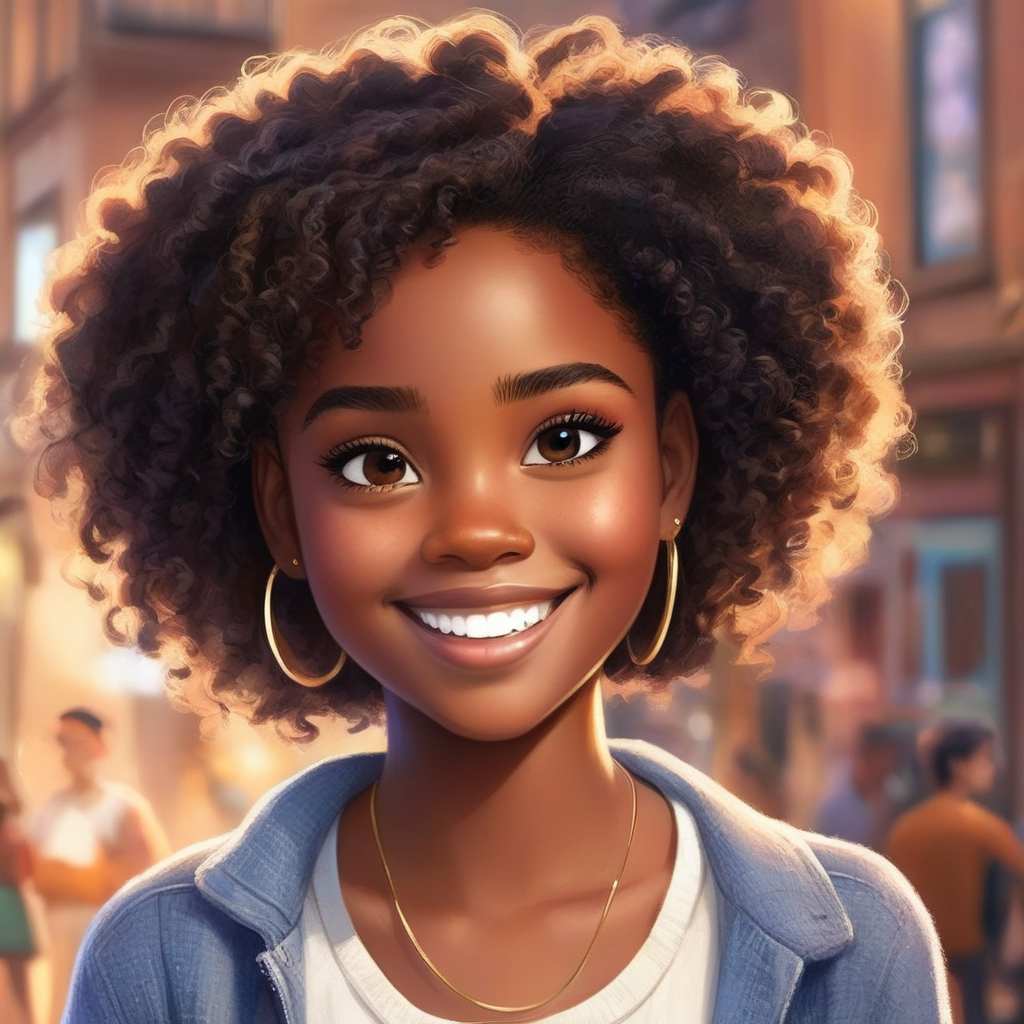

In [2]:
Prompt = "Pixar style young black woman with big brown eyes, smiling broadly and looking straight at the camera" # @param {type:"string"}
Negative_Prompt = "ugly, blender, distorted, deformed" # @param {type:"string"}

from diffusers import StableDiffusionXLPipeline
import torch

def ImageGenerator(prompt, negative_prompt):
  # download pre-trained model from Hugging Face
  pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
  pipe.to("cuda")
  prompt = prompt # Your prompt here
  neg_prompt = negative_prompt # Negative prompt here
  image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

  return image

ImageGenerator(prompt = Prompt, negative_prompt = Negative_Prompt)

# **Build Gradio Frontend**

In [ ]:
from diffusers import StableDiffusionXLPipeline
import gradio as gr
import torch

def ImageGenerator(prompt, negative_prompt):
  # download pre-trained model from Hugging Face
  pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
  pipe.to("cuda")
  prompt = prompt # Your prompt here
  neg_prompt = negative_prompt # Negative prompt here
  image = pipe(prompt=prompt, negative_prompt=neg_prompt).images[0]

  return image

app = gr.Interface(ImageGenerator,
                   inputs = [gr.Text(label="Prompt",placeholder="Write Prompt"),gr.Text(label="Negative Prompt",placeholder="Write Negative Prompt")],
                   outputs = gr.Image(label="Image"),
                   #css =".gradio-container {background-image: linear-gradient(#7F7FD5, #91EAE4, #A3C9E2)}",
                   theme = gr.themes.Soft(),
                   title = "Text-To-Image Generator")

app.launch()